01. Import Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

In [3]:
path = r'/Users/kevinclancy/Desktop/NFL'

In [4]:
spreads = pd.read_csv(os.path.join(path, '02 Data', 'cleaned data', 'NFL_spreads_update3.csv'))

In [5]:
pd.set_option('display.max_columns', None)

02. Data Cleaning

In [7]:
spreads.head()

,Unnamed: 0.1,Unnamed: 0,game_date,season,week,day_of_week,time_of_game,primetime,playoff_game,team_home,score_home,score_away,team_away,team_favored_id,point_spread,total_line,stadium,game_location,stadium_capacity,stadium_latitude,stadium_longitude,stadium_elevation,stadium_neutral,weather_temp,wind_mph,indoor,point_differential,total_points_scored,favorite,total_result,result,cover_result,team_favored_id_int,spread_category,winner,loser,cover_id
0,0,0,9/8/16,2016,1,3,8:30 PM,1,0,DEN,21,20,CAR,CAR,-3.0,40.5,Empower Field at Mile High,"Denver, Colorado","76,125",39.743889,-105.020000,5280.0,0,82,2,0,1,41,0,1,1,1,5,Low Spread,DEN,CAR,DEN
1,1,1,9/11/16,2016,1,6,8:30 PM,1,0,ARI,21,23,NE,ARI,-8.5,44.0,State Farm Stadium,"Glendale, Arizona","63,400",33.528000,-112.263000,1068.0,0,72,0,1,-2,44,1,2,0,0,1,High Spread,NE,ARI,NE
2,2,2,9/11/16,2016,1,6,1:00 PM,0,0,ATL,24,31,TB,ATL,-2.5,47.0,Mercedes-Benz Stadium,"Atlanta, Georgia",71000,33.755556,-84.400000,1050.0,0,72,0,1,-7,55,1,1,0,0,2,Low Spread,TB,ATL,TB
3,3,3,9/11/16,2016,1,6,1:00 PM,0,0,BAL,13,7,BUF,BAL,-3.0,44.5,M&T Bank Stadium,"Baltimore, Maryland","71,008",39.278056,-76.622778,50.0,0,82,7,0,6,20,1,0,1,1,3,Low Spread,BAL,BUF,BAL
4,4,4,9/11/16,2016,1,6,4:30 PM,0,0,DAL,19,20,NYG,NYG,-1.0,47.5,AT&T Stadium,"Arlington, Texas","80,000",32.747778,-97.092778,607.0,0,72,0,1,-1,39,0,0,0,2,24,Low Spread,NYG,DAL,Push


In [8]:
spreads.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'stadium_latitude', 'stadium_longitude', 'stadium_elevation'], inplace=True)

In [9]:
non_playoff_games = spreads[spreads['playoff_game'] == 0]

In [10]:
non_playoff_games.head()

,game_date,season,week,day_of_week,time_of_game,primetime,playoff_game,team_home,score_home,score_away,team_away,team_favored_id,point_spread,total_line,stadium,game_location,stadium_capacity,stadium_neutral,weather_temp,wind_mph,indoor,point_differential,total_points_scored,favorite,total_result,result,cover_result,team_favored_id_int,spread_category,winner,loser,cover_id
0,9/8/16,2016,1,3,8:30 PM,1,0,DEN,21,20,CAR,CAR,-3.0,40.5,Empower Field at Mile High,"Denver, Colorado","76,125",0,82,2,0,1,41,0,1,1,1,5,Low Spread,DEN,CAR,DEN
1,9/11/16,2016,1,6,8:30 PM,1,0,ARI,21,23,NE,ARI,-8.5,44.0,State Farm Stadium,"Glendale, Arizona","63,400",0,72,0,1,-2,44,1,2,0,0,1,High Spread,NE,ARI,NE
2,9/11/16,2016,1,6,1:00 PM,0,0,ATL,24,31,TB,ATL,-2.5,47.0,Mercedes-Benz Stadium,"Atlanta, Georgia",71000,0,72,0,1,-7,55,1,1,0,0,2,Low Spread,TB,ATL,TB
3,9/11/16,2016,1,6,1:00 PM,0,0,BAL,13,7,BUF,BAL,-3.0,44.5,M&T Bank Stadium,"Baltimore, Maryland","71,008",0,82,7,0,6,20,1,0,1,1,3,Low Spread,BAL,BUF,BAL
4,9/11/16,2016,1,6,4:30 PM,0,0,DAL,19,20,NYG,NYG,-1.0,47.5,AT&T Stadium,"Arlington, Texas","80,000",0,72,0,1,-1,39,0,0,0,2,24,Low Spread,NYG,DAL,Push


In [11]:
non_playoff_games.drop(columns=['playoff_game', 'stadium_capacity', 'team_favored_id_int'], inplace = True)

/var/folders/v3/6fcll29s2gb15qgr6wfszqdc0000gn/T/ipykernel_32083/414246720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playoff_games.drop(columns=['playoff_game', 'stadium_capacity', 'team_favored_id_int'], inplace = True)


In [12]:
non_playoff_games.head()

,game_date,season,week,day_of_week,time_of_game,primetime,team_home,score_home,score_away,team_away,team_favored_id,point_spread,total_line,stadium,game_location,stadium_neutral,weather_temp,wind_mph,indoor,point_differential,total_points_scored,favorite,total_result,result,cover_result,spread_category,winner,loser,cover_id
0,9/8/16,2016,1,3,8:30 PM,1,DEN,21,20,CAR,CAR,-3.0,40.5,Empower Field at Mile High,"Denver, Colorado",0,82,2,0,1,41,0,1,1,1,Low Spread,DEN,CAR,DEN
1,9/11/16,2016,1,6,8:30 PM,1,ARI,21,23,NE,ARI,-8.5,44.0,State Farm Stadium,"Glendale, Arizona",0,72,0,1,-2,44,1,2,0,0,High Spread,NE,ARI,NE
2,9/11/16,2016,1,6,1:00 PM,0,ATL,24,31,TB,ATL,-2.5,47.0,Mercedes-Benz Stadium,"Atlanta, Georgia",0,72,0,1,-7,55,1,1,0,0,Low Spread,TB,ATL,TB
3,9/11/16,2016,1,6,1:00 PM,0,BAL,13,7,BUF,BAL,-3.0,44.5,M&T Bank Stadium,"Baltimore, Maryland",0,82,7,0,6,20,1,0,1,1,Low Spread,BAL,BUF,BAL
4,9/11/16,2016,1,6,4:30 PM,0,DAL,19,20,NYG,NYG,-1.0,47.5,AT&T Stadium,"Arlington, Texas",0,72,0,1,-1,39,0,0,0,2,Low Spread,NYG,DAL,Push


In [13]:
team_performance = {}

# Iterate through each row in the dataframe
for index, row in non_playoff_games.iterrows():
    winner = row['winner']
    loser = row['loser']

    # Check if the game resulted in a tie
    if winner == 'tie':
        # For ties, both teams are considered to have a tie
        if loser not in team_performance:
            team_performance[loser] = {'wins': 0, 'losses': 0, 'ties': 0}
        team_performance[loser]['ties'] += 1

        if row['loser'] not in team_performance:
            team_performance[row['loser']] = {'wins': 0, 'losses': 0, 'ties': 0}
        team_performance[row['loser']]['ties'] += 1
    else:
        # For non-tie games, update win and loss records
        if winner not in team_performance:
            team_performance[winner] = {'wins': 0, 'losses': 0, 'ties': 0}
        if loser not in team_performance:
            team_performance[loser] = {'wins': 0, 'losses': 0, 'ties': 0}
        team_performance[winner]['wins'] += 1
        team_performance[loser]['losses'] += 1

In [14]:
team_performance_df = pd.DataFrame.from_dict(team_performance, orient='index')

In [15]:
team_performance_df

,wins,losses,ties
DEN,52,79,0
CAR,48,83,0
NE,79,52,0
ARI,50,79,0
TB,67,64,0
ATL,60,71,0
BAL,83,48,0
BUF,80,50,0
NYG,48,82,0
DAL,82,49,0


In [16]:
wins = non_playoff_games['winner'].value_counts()
losses = non_playoff_games['loser'].value_counts()
spread_cover = non_playoff_games['cover_id'].value_counts()

# create df with wins, losses, and spread_cover counts
team_performance_df = pd.DataFrame({'wins': wins, 'losses': losses, 'spread_cover': spread_cover})

In [17]:
# add and calculate columns total_games, win_percentage, and cover_percentage
team_performance_df['total_games'] = team_performance_df['wins'] + team_performance_df['losses']
team_performance_df['win_percentage'] = (team_performance_df['wins'] / team_performance_df['total_games']) * 100
team_performance_df['cover_percentage'] = (team_performance_df['spread_cover'] / team_performance_df['total_games']) * 100

In [18]:
team_performance_df

,wins,losses,spread_cover,total_games,win_percentage,cover_percentage
ARI,50.0,79.0,61.0,129.0,38.759690,47.286822
ATL,60.0,71.0,58.0,131.0,45.801527,44.274809
BAL,83.0,48.0,67.0,131.0,63.358779,51.145038
BUF,80.0,50.0,65.0,130.0,61.538462,50.000000
CAR,48.0,83.0,54.0,131.0,36.641221,41.221374
CHI,52.0,79.0,57.0,131.0,39.694656,43.511450
CIN,56.0,72.0,69.0,128.0,43.750000,53.906250
CLE,51.0,79.0,51.0,130.0,39.230769,39.230769
DAL,82.0,49.0,73.0,131.0,62.595420,55.725191
DEN,52.0,79.0,58.0,131.0,39.694656,44.274809


Average Win Percentage = 49.99
Average Cover Percentage = 48.52

In [19]:
team_performance_df.corr()

,wins,losses,spread_cover,total_games,win_percentage,cover_percentage
wins,1.000000,-0.322664,0.716897,0.584897,0.814248,0.694761
losses,-0.322664,1.000000,-0.731438,0.578999,-0.812169,-0.713354
spread_cover,0.716897,-0.731438,1.000000,-0.147981,0.722832,0.997430
total_games,0.584897,0.578999,-0.147981,1.000000,0.005413,-0.218250
win_percentage,0.814248,-0.812169,0.722832,0.005413,1.000000,0.702612
cover_percentage,0.694761,-0.713354,0.997430,-0.218250,0.702612,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

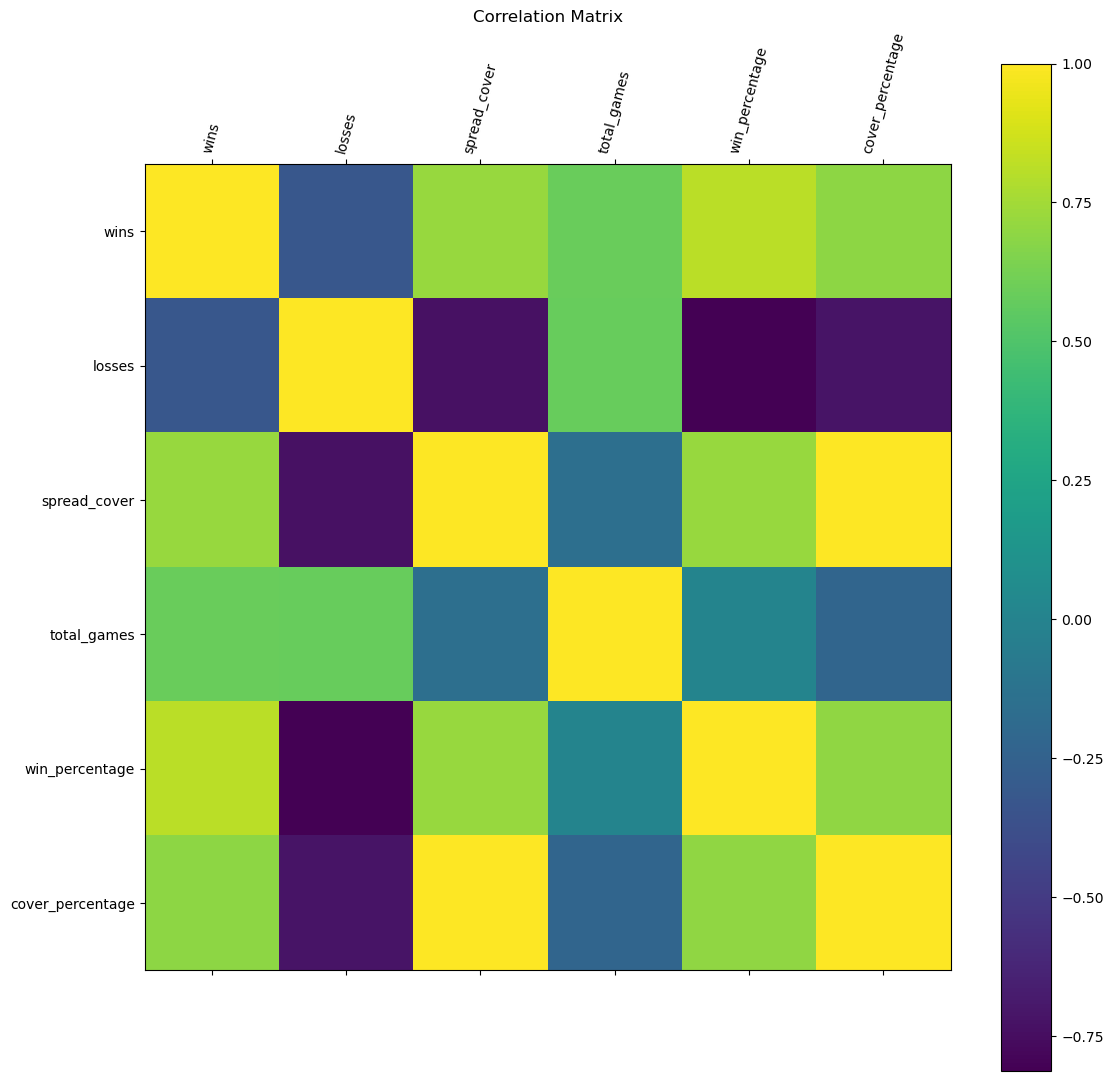

In [20]:
# create correlation heatmap
sp = plt.figure(figsize=(13, 13))
plt.matshow(team_performance_df.corr(), fignum=sp.number)
plt.xticks(range(team_performance_df.shape[1]), team_performance_df.columns, fontsize = 10, rotation=75)
plt.yticks(range(team_performance_df.shape[1]), team_performance_df.columns, fontsize = 10)
cb = plt.colorbar()
plt.title('Correlation Matrix')

In [21]:
team_performance_df.to_csv(os.path.join(path, '02 Data', 'cleaned data', 'Team_Performance.csv'))